<a href="https://colab.research.google.com/github/jakubdaron/data_science_course_udemy/blob/main/Uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klasyfikator wieloklasowy - Digit recognition

Tensorflow i Keras

pierwszy model sieci - problem klasyfikacji
- zapoznanie sie z budowa prostych sieci neuronowych za zbiorze danych MNIST

Import bibliotek

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)


2.13.0


Załadowanie i przygotowanie danych

In [5]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [9]:
print(X_train[6])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16 191 253 252  71   0   0   0   

In [10]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [11]:
X_train = X_train / 255.
X_test = X_test / 255.

Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

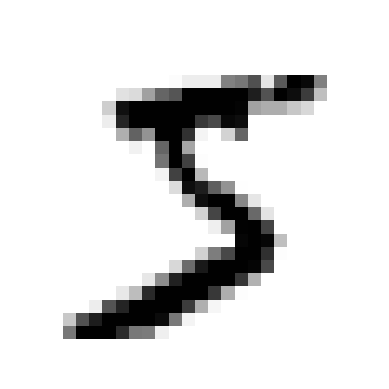

In [12]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

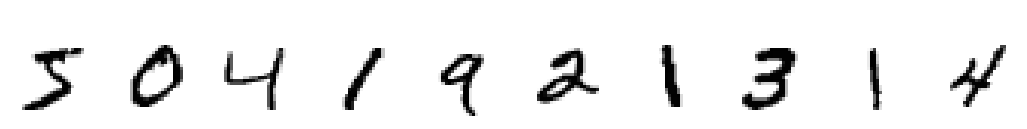

In [13]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

Budowa sieci neuronowej

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Trenowanie modelu

In [15]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3013 - accuracy: 0.9123
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1476 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1091 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9758


Ocena modelu

In [16]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0804 - accuracy: 0.9748 - 453ms/epoch - 1ms/step


[0.08039578795433044, 0.9747999906539917]

In [18]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.301318,0.912350
1,0.147551,0.956533
2,0.109120,0.966800
3,0.090627,0.972550
4,0.078004,0.975783


In [19]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

Predykcja na podstawie modelu

In [20]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[0.000000013947, 0.000000226361, 0.000029268018, ..., 0.9962393     , 0.000000054587, 0.000001422456],
       [0.000000073103, 0.0038520854  , 0.9959333     , ..., 0.000000000001, 0.000003118666, 0.000000000018],
       [0.000000010795, 0.99959797    , 0.000080507525, ..., 0.00023849793 , 0.000039440736, 0.000001517125],
       ...,
       [0.            , 0.000000000047, 0.000000000003, ..., 0.00000095986 , 0.000000098255, 0.000013133906],
       [0.000000003392, 0.000000001899, 0.            , ..., 0.000000000151, 0.00001118914 , 0.00000000056 ],
       [0.000000508049, 0.000000000001, 0.000000086267, ..., 0.000000000001, 0.000000010786, 0.000000002702]],
      dtype=float32)

In [29]:
predict_x=model.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)
y_pred

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [30]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [31]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]


Int64Index([33, 149, 151, 217, 247, 259, 290, 320, 321, 340], dtype='int64')

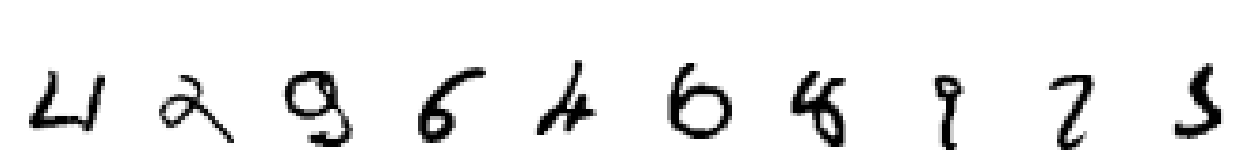

In [33]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()